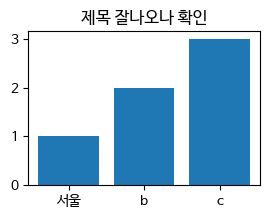

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [42]:
##################################
## 코렙에서 실행
###################################
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(3,2))
plt.title('제목 잘나오나 확인')
plt.bar(x=['서울','b','c'], height=[1,2,3])
plt.show()

##########################
###
### 차트에서 '서울' 이라는 글자가 잘 나오면 됨
### 한글 잘안나오면  런타임 다시 실행
#########################
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [39]:
################################3
#### 네이버 쇼핑api에서 키워드 '직장인'으로 검색하여 다운받은
### 도시락.csv를 코렙으로 업로드 합니다.
#################################
path='/content/도시락.csv'
import pandas as pd
df=pd.read_csv(path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1000 non-null   object 
 1   link         1000 non-null   object 
 2   image        1000 non-null   object 
 3   lprice       1000 non-null   int64  
 4   hprice       0 non-null      float64
 5   mallName     1000 non-null   object 
 6   productId    1000 non-null   int64  
 7   productType  1000 non-null   int64  
 8   brand        540 non-null    object 
 9   maker        350 non-null    object 
 10  category1    1000 non-null   object 
 11  category2    1000 non-null   object 
 12  category3    1000 non-null   object 
 13  category4    1000 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 109.5+ KB


In [40]:
df.iloc[:,8:].describe()
df['lprice'].describe()

,lprice
count,1000.000000
mean,21998.800000
std,14774.910034
min,1930.000000
25%,10725.000000
50%,19550.000000
75%,28170.000000
max,69900.000000


In [41]:
myPrompt=df.iloc[:,8:].describe()
myPrompt=df['lprice'].describe()

In [15]:
#####################################
###
!pip install langchain_community
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00


In [ ]:
#################################################
## gpt를 연결하여서 위의 결과물을 해석하게 함
##################################################


from langchain_openai import ChatOpenAI
import os
openai_api_key = '랭체인키로 키값으로 사용하세요.'
os.environ['OPENAI_API_KEY'] = openai_api_key

llm = ChatOpenAI(model="gpt-4o")
# chain 실행
#target='8'
msg=f'{myPrompt} 해석하고, 인사이트를 도출해줘'
result=llm.invoke(msg)  # lim(msg)  # lim.__call__(msg) 도 가능

result

AIMessage(content='주어진 데이터는 "lprice"라는 변수의 기초 통계량을 보여주고 있습니다. 이를 해석하고, 몇 가지 인사이트를 도출해 보겠습니다.\n\n### 데이터 해석\n\n1. **count (1000.000000)**: 데이터셋에 포함된 관측치의 수는 1,000개입니다.\n\n2. **mean (21998.800000)**: 평균값은 약 21,998.8입니다. 이는 데이터의 중심 경향을 나타냅니다.\n\n3. **std (14774.910034)**: 표준 편차는 약 14,774.91로, 이는 데이터가 평균값으로부터 얼마나 흩어져 있는지를 측정합니다. 상대적으로 큰 표준 편차는 데이터의 변동성이 크다는 것을 시사합니다.\n\n4. **min (1930.000000)**: 최솟값은 1,930으로 데이터셋에서 가장 작은 값입니다.\n\n5. **25% (10725.000000)**: 1사분위수(Q1)는 10,725로, 이는 데이터의 하위 25% 값보다 큽니다.\n\n6. **50% (19550.000000)**: 중앙값(또는 2사분위수, Q2)은 19,550으로, 데이터의 중간 지점을 나타냅니다.\n\n7. **75% (28170.000000)**: 3사분위수(Q3)는 28,170으로, 이는 데이터의 하위 75% 값보다 큽니다.\n\n8. **max (69900.000000)**: 최댓값은 69,900으로 데이터셋에서 가장 큰 값입니다.\n\n### 인사이트\n\n1. **데이터의 분포**:\n   - 중위수(19,550)와 평균(21,998.8)이 다소 차이가 나므로, 데이터가 약간의 비대칭성을 가질 수 있습니다.\n   - 평균이 중위수보다 크기 때문에 오른쪽으로 꼬리가 긴 분포(우측으로 치우친 분포)일 가능성이 있습니다.\n\n2. **변동성**:\n   - 높은 표준 편차는 데이터가 상당히 넓게 퍼져 있다는 것을 시사합니다. 이는 다양한 범위의 값들이 존재함을 의미합니다.\n\n3. **사분위수 범위**:\n   - 사분위수 범위

In [44]:
###############################
## 마크다운을 이용한 출력
###############################
from IPython.display import display
from IPython.display import Markdown
display(Markdown(result.content))


주어진 데이터는 "lprice"라는 변수의 기초 통계량을 보여주고 있습니다. 이를 해석하고, 몇 가지 인사이트를 도출해 보겠습니다.

### 데이터 해석

1. **count (1000.000000)**: 데이터셋에 포함된 관측치의 수는 1,000개입니다.

2. **mean (21998.800000)**: 평균값은 약 21,998.8입니다. 이는 데이터의 중심 경향을 나타냅니다.

3. **std (14774.910034)**: 표준 편차는 약 14,774.91로, 이는 데이터가 평균값으로부터 얼마나 흩어져 있는지를 측정합니다. 상대적으로 큰 표준 편차는 데이터의 변동성이 크다는 것을 시사합니다.

4. **min (1930.000000)**: 최솟값은 1,930으로 데이터셋에서 가장 작은 값입니다.

5. **25% (10725.000000)**: 1사분위수(Q1)는 10,725로, 이는 데이터의 하위 25% 값보다 큽니다.

6. **50% (19550.000000)**: 중앙값(또는 2사분위수, Q2)은 19,550으로, 데이터의 중간 지점을 나타냅니다.

7. **75% (28170.000000)**: 3사분위수(Q3)는 28,170으로, 이는 데이터의 하위 75% 값보다 큽니다.

8. **max (69900.000000)**: 최댓값은 69,900으로 데이터셋에서 가장 큰 값입니다.

### 인사이트

1. **데이터의 분포**:
   - 중위수(19,550)와 평균(21,998.8)이 다소 차이가 나므로, 데이터가 약간의 비대칭성을 가질 수 있습니다.
   - 평균이 중위수보다 크기 때문에 오른쪽으로 꼬리가 긴 분포(우측으로 치우친 분포)일 가능성이 있습니다.

2. **변동성**:
   - 높은 표준 편차는 데이터가 상당히 넓게 퍼져 있다는 것을 시사합니다. 이는 다양한 범위의 값들이 존재함을 의미합니다.

3. **사분위수 범위**:
   - 사분위수 범위(IQR)인 Q3 - Q1은 28,170 - 10,725 = 17,445입니다. 이는 데이터의 중간 50%가 이 범위에 분포함을 의미합니다.
   - IQR에 비해 전체 범위(69,900 - 1,930 = 67,970)가 훨씬 크므로, 극단적인 값(이상치)가 존재할 가능성이 있습니다.

4. **이상치의 가능성**:
   - 최댓값과 최솟값이 중앙값에서 상당히 떨어져 있기 때문에, 이상치가 존재할 수 있습니다. 데이터의 분포를 더 잘 이해하기 위해 히스토그램이나 박스 플롯을 생성하여 이상치를 시각적으로 확인하는 것이 좋습니다.

이러한 해석을 바탕으로 데이터의 특성을 더 잘 이해하고, 이상치를 다루거나 추가 분석을 수행할 수 있습니다.

In [ ]:
#############################################
## 히스토리 기능
############################################
from IPython.display import display
from IPython.display import Markdown

from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
import os
openai_api_key = '랭체인키로 키값으로 사용하세요.'
os.environ['OPENAI_API_KEY'] = openai_api_key


memory = ConversationBufferMemory()
conversation = ConversationChain(llm=llm, memory=memory)

msg = f'{myPrompt} 해석해줘?'

result = conversation.run(msg)
display(Markdown(result))




이 데이터는 'lprice'라는 변수의 요약 통계치를 보여주고 있어요. 여기서 각각의 값은 다음과 같은 의미를 가지고 있습니다:

- **count (개수)**: 1000으로, 총 1000개의 데이터 포인트가 있다는 것을 의미합니다.
- **mean (평균)**: 평균 값은 21998.8로, 모든 데이터 포인트의 평균이 약 21998.8입니다.
- **std (표준편차)**: 표준편차는 14774.91로, 데이터가 평균으로부터 얼마나 분산되어 있는지를 나타냅니다. 높은 값은 데이터가 평균으로부터 크게 흩어져 있음을 의미합니다.
- **min (최소값)**: 데이터의 최소값은 1930입니다.
- **25% (1사분위수)**: 데이터의 하위 25%는 10725 이하입니다. 즉, 데이터의 25%가 10725보다 작거나 같다는 것을 의미합니다.
- **50% (중앙값, 2사분위수)**: 중앙값은 19550으로, 데이터의 중간값입니다. 데이터의 절반이 19550 이하라는 것을 나타냅니다.
- **75% (3사분위수)**: 데이터의 상위 25%는 28170 이상입니다. 즉, 데이터의 75%가 28170보다 작거나 같다는 것을 의미합니다.
- **max (최대값)**: 데이터의 최대값은 69900입니다.

이 통계치는 데이터의 분포와 범위를 이해하는 데 유용합니다. 데이터가 어떤 형태로 퍼져 있는지, 이상치가 있는지 등을 파악하는 데 도움이 됩니다.

In [47]:
result = conversation.run("인사이트 도출")
# 결과 출력
display(Markdown(result))

이 데이터의 요약 통계에서 몇 가지 흥미로운 인사이트를 도출할 수 있습니다:

1. **데이터 분포**: 평균(21998.8)과 중앙값(19550)을 비교해 보면, 평균이 중앙값보다 약간 크다는 것을 알 수 있습니다. 이는 데이터가 오른쪽으로 약간 치우친 분포를 가질 수 있음을 시사합니다. 즉, 몇몇 큰 값이 평균을 높이고 있을 가능성이 있습니다.

2. **데이터 변동성**: 표준편차가 14774.91로, 평균에 비해 상당히 큰 값을 가지고 있습니다. 이는 데이터 포인트들이 평균으로부터 크게 흩어져 있다는 것을 나타내며, 데이터 내의 변동성이 크다는 것을 의미합니다.

3. **이상치 가능성**: 최대값이 69900으로, 평균과 중앙값에 비해 매우 큽니다. 이는 데이터에 몇몇 이상치가 있을 가능성을 시사합니다. 이러한 이상치는 분석 시 특별한 주의를 필요로 할 수 있습니다.

4. **사분위수 해석**: 1사분위수(25%)가 10725이고, 3사분위수(75%)가 28170이므로, 중간 50%의 데이터가 이 범위 안에 있습니다. 이 범위가 넓다는 것은 데이터의 다양성이 크다는 것을 나타냅니다.

이러한 인사이트는 데이터의 특성을 이해하고, 이후 분석 방향을 설정하는 데 도움이 됩니다. 추가적인 분석을 통해 이상치를 어떻게 처리할지, 데이터의 분포를 시각화할지 결정할 수 있습니다.

In [48]:
result = conversation.run("왜도값을 확인")
# 결과 출력
display(Markdown(result))

왜도(skewness)는 데이터의 비대칭성을 측정하는 통계적 척도입니다. 왜도값을 확인하면 데이터 분포가 좌우로 얼마나 치우쳐 있는지를 파악할 수 있습니다. 양의 왜도는 오른쪽 꼬리가 더 길다는 것을 의미하고, 음의 왜도는 왼쪽 꼬리가 더 길다는 것을 의미합니다. 왜도값이 0에 가까우면 데이터가 대칭적으로 분포되어 있다는 것을 나타냅니다.

주어진 요약 통계 정보로는 왜도값을 직접 계산할 수 없지만, 평균이 중앙값보다 크다는 점에서 양의 왜도를 가질 가능성이 있습니다. 이를 정확히 확인하기 위해서는 데이터의 왜도를 계산해야 합니다. 왜도는 보통 통계 소프트웨어나 프로그래밍 언어(예: Python의 `scipy.stats` 라이브러리)를 사용하여 쉽게 계산할 수 있습니다. 추가적인 계산이나 분석을 통해 왜도값을 얻어 보시면 좋을 것 같습니다!

In [49]:
result = conversation.run("코드생성. 차트도")
# 결과 출력
display(Markdown(result))

데이터의 왜도를 계산하고 히스토그램과 상자 그림(box plot)을 생성하는 Python 코드를 제공할 수 있습니다. 이 코드는 `pandas`, `matplotlib`, 및 `scipy` 라이브러리를 사용하여 데이터를 분석하고 시각화합니다.

```python
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# 예시 데이터 생성
# 실제 데이터가 있다면, 해당 데이터를 사용하세요.
data = {
    'lprice': [1930, 10725, 19550, 28170, 69900] * 200  # 예시로 데이터 포인트를 반복
}
df = pd.DataFrame(data)

# 왜도 계산
skewness = skew(df['lprice'])
print(f"Skewness: {skewness}")

# 히스토그램 생성
plt.figure(figsize=(12, 6))
plt.hist(df['lprice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of lprice')
plt.xlabel('lprice')
plt.ylabel('Frequency')
plt.axvline(df['lprice'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['lprice'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

# 상자 그림(box plot) 생성
plt.figure(figsize=(8, 6))
plt.boxplot(df['lprice'], vert=False)
plt.title('Box Plot of lprice')
plt.xlabel('lprice')
plt.show()
```

이 코드는 `lprice` 열의 왜도를 계산하고, 히스토그램과 상자 그림을 각각 생성합니다. 히스토그램에는 평균과 중앙값을 시각적으로 표시합니다. 실제 데이터가 있을 경우, 해당 데이터로 대체하여 분석을 수행할 수 있습니다. 이 시각화는 데이터 분포의 대략적인 모양을 이해하는 데 도움이 됩니다.

왜도값: 1.048184439463025


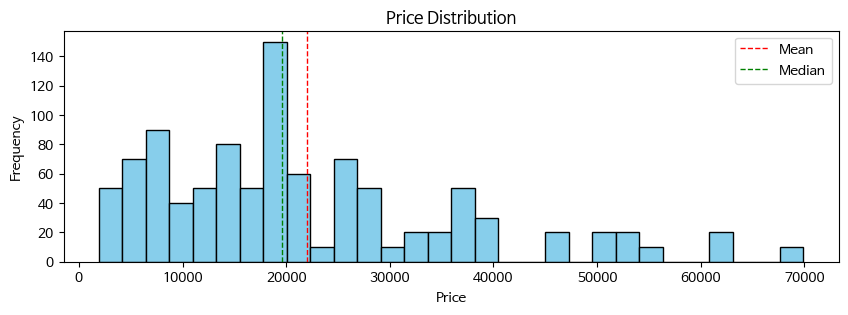

In [52]:
#####################
##
## 왜도값 계산
#####################
from scipy.stats import skew
skewness_value = skew(df['lprice'])
print(f"왜도값: {skewness_value}")

# 히스토그램 생성
plt.figure(figsize=(10, 3))
plt.hist(df['lprice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(df['lprice'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['lprice'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

In [63]:
result = conversation.run(" df['brand'], df['maker'] count 집계 차트 시각화 출력 및 인사이트 , 단 1행 2열로")
# 결과 출력
display(Markdown(result))


`df` 데이터프레임의 `brand`와 `maker` 열에 대한 데이터 개수를 집계하고, 이를 1행 2열의 차트로 시각화하는 방법을 안내하겠습니다. 이를 통해 각 브랜드와 제조사의 데이터 분포를 시각적으로 이해할 수 있습니다.

```python
import pandas as pd
import matplotlib.pyplot as plt

# 예시: df 데이터프레임이 이미 존재한다고 가정합니다.
# df = pd.read_csv('/content/도시락.csv')  # 이미 할당된 데이터프레임이라고 가정

# 브랜드별 개수 집계
brand_counts = df['brand'].value_counts()

# 제조사별 개수 집계
maker_counts = df['maker'].value_counts()

# 1행 2열의 차트 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 브랜드별 데이터 카운트 차트
axes[0].bar(brand_counts.index, brand_counts.values, color='skyblue')
axes[0].set_title('Count by Brand')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Count')

# 제조사별 데이터 카운트 차트
axes[1].bar(maker_counts.index, maker_counts.values, color='lightgreen')
axes[1].set_title('Count by Maker')
axes[1].set_xlabel('Maker')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
```

### 인사이트:
1. **데이터 분포**: 두 차트는 브랜드와 제조사별로 데이터가 어떻게 분포되어 있는지를 시각적으로 보여줍니다. 이를 통해 특정 브랜드나 제조사가 데이터셋에서 더 큰 비중을 차지하는지 확인할 수 있습니다.

2. **편향성 확인**: 특정 브랜드나 제조사의 데이터 개수가 상대적으로 많거나 적다면, 데이터가 특정 방향으로 편향되어 있을 가능성을 나타냅니다. 이는 분석 결과에 영향을 미칠 수 있기 때문에 주의가 필요합니다.

3. **전략적 의사결정**: 데이터가 많은 브랜드나 제조사는 이미 시장에서 널리 사용되고 있을 가능성이 있으며, 데이터가 적은 브랜드는 성장 가능성이 있는 영역일 수 있습니다. 이러한 정보는 마케팅 및 판매 전략을 조정하는 데 유용하게 활용될 수 있습니다.

이러한 시각화는 데이터 분석 과정에서 중요한 초기 단계로, 데이터의 구조와 특성을 이해하는 데 매우 유용합니다.

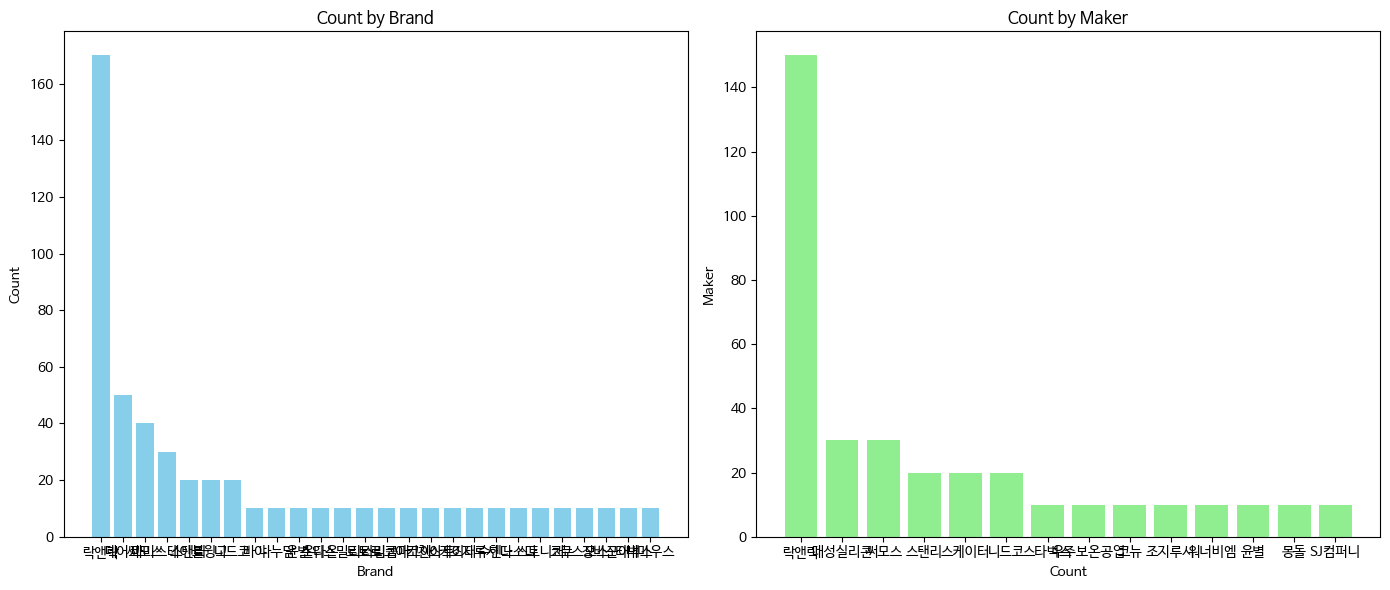

In [66]:
# 브랜드별 개수 집계
brand_counts = df['brand'].value_counts()

# 제조사별 개수 집계
maker_counts = df['maker'].value_counts()

# 1행 2열의 차트 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 브랜드별 데이터 카운트 차트
axes[0].bar(brand_counts.index, brand_counts.values, color='skyblue')
axes[0].set_title('Count by Brand')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Count')

# 제조사별 데이터 카운트 차트
axes[1].bar(maker_counts.index, maker_counts.values, color='lightgreen')
axes[1].set_title('Count by Maker')
axes[1].set_ylabel('Maker')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

In [68]:
#########################################
## 위 차트는 x축의 한글 이름 겹침현상이 있음으로 y축으로 변경해야함.
## gpt에게 차트의 문제점 및 개선사항, 또는 차트 인사이트등을 요청할수 있음.
##########################################
result = conversation.run("위 차트의 문제점 파악 하고, 개선 코드")
# 결과 출력
display(Markdown(result))

차트를 개선하기 위해 고려해야 할 몇 가지 문제점과 그에 따른 개선 방법을 제안하겠습니다.

### 문제점:
1. **가독성 문제**: 범주가 많을 경우 레이블이 겹치거나 차트가 복잡해질 수 있습니다.
2. **데이터 불균형**: 특정 범주가 다른 범주에 비해 너무 많거나 적다면, 상대적으로 작은 범주가 눈에 잘 띄지 않을 수 있습니다.
3. **색상 대비 문제**: 차트의 색상이 잘 구분되지 않을 수 있습니다.
4. **레이블 표시 부족**: 차트에 데이터 값을 직접 표시하지 않으면 구체적인 정보 파악이 어려울 수 있습니다.

### 개선 코드:
아래 코드는 위 문제를 해결하기 위한 몇 가지 개선 사항을 반영합니다.

```python
import pandas as pd
import matplotlib.pyplot as plt

# 예시: df 데이터프레임이 이미 존재한다고 가정합니다.
# df = pd.read_csv('/content/도시락.csv')  # 이미 할당된 데이터프레임이라고 가정

# 브랜드별 개수 집계
brand_counts = df['brand'].value_counts()

# 제조사별 개수 집계
maker_counts = df['maker'].value_counts()

# 1행 2열의 차트 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# 개선된 브랜드별 데이터 카운트 차트
axes[0].bar(brand_counts.index, brand_counts.values, color='skyblue')
axes[0].set_title('Count by Brand', fontsize=14)
axes[0].set_xlabel('Brand', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # x-axis 레이블 회전
for i, v in enumerate(brand_counts.values):
    axes[0].text(i, v + 0.5, str(v), ha='center')  # 데이터 레이블 추가

# 개선된 제조사별 데이터 카운트 차트
axes[1].bar(maker_counts.index, maker_counts.values, color='lightgreen')
axes[1].set_title('Count by Maker', fontsize=14)
axes[1].set_xlabel('Maker', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # x-axis 레이블 회전
for i, v in enumerate(maker_counts.values):
    axes[1].text(i, v + 0.5, str(v), ha='center')  # 데이터 레이블 추가

plt.tight_layout()
plt.show()
```

### 개선된 점:
- **레이블 회전**: x축 레이블을 45도로 회전시켜 겹침을 방지했습니다.
- **데이터 레이블 추가**: 각 바 위에 데이터를 표시하여 구체적인 값을 쉽게 확인할 수 있도록 했습니다.
- **글꼴 크기 조정**: 차트 제목과 축 레이블의 글꼴 크기를 키워 가독성을 높였습니다.

이러한 개선을 통해 차트의 가독성을 향상시키고 데이터를 명확하게 전달할 수 있습니다.

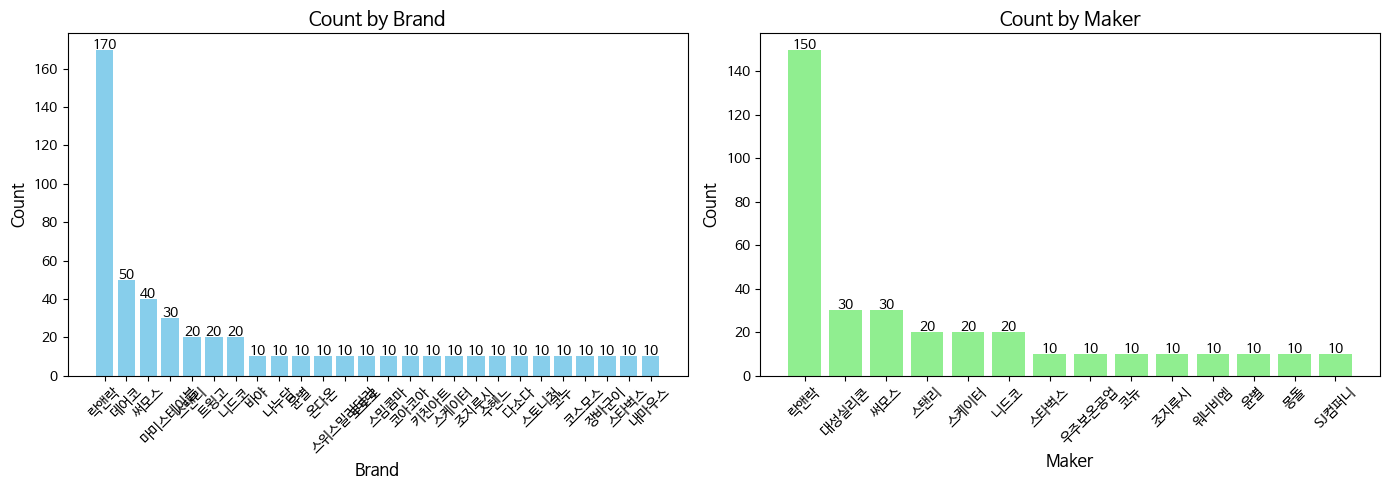

In [70]:
# 브랜드별 개수 집계
brand_counts = df['brand'].value_counts()

# 제조사별 개수 집계
maker_counts = df['maker'].value_counts()

# 1행 2열의 차트 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # gpt와 상관없이 직접 높이를 5로 변경함.

# 개선된 브랜드별 데이터 카운트 차트
axes[0].bar(brand_counts.index, brand_counts.values, color='skyblue')
axes[0].set_title('Count by Brand', fontsize=14)
axes[0].set_xlabel('Brand', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # x-axis 레이블 회전
for i, v in enumerate(brand_counts.values):
    axes[0].text(i, v + 0.5, str(v), ha='center')  # 데이터 레이블 추가

# 개선된 제조사별 데이터 카운트 차트
axes[1].bar(maker_counts.index, maker_counts.values, color='lightgreen')
axes[1].set_title('Count by Maker', fontsize=14)
axes[1].set_xlabel('Maker', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # x-axis 레이블 회전
for i, v in enumerate(maker_counts.values):
    axes[1].text(i, v + 0.5, str(v), ha='center')  # 데이터 레이블 추가

plt.tight_layout()
plt.show()

###############################
## 차트위에서 마우스 우측 클릭하여 저장합니다.
## 또는 차트저장 명령어를 찾아서 저장합니다. 이 차트는 파워포인트에 삽입하여 사용합니다.
###################################

In [74]:
#########################################
## gpt에서 도출된 인사이트를 차트 데이터와 함께 사용.
##########################################
result = conversation.run("차트에 대한 인사이트를 도출, 개선점 제안")
# 결과 출력
display(Markdown(result))

차트를 분석하여 인사이트를 도출하고, 그에 기반한 개선점을 제안하는 것은 데이터 시각화를 더욱 효과적으로 만드는 핵심 과정입니다. 아래는 차트를 기반으로 한 인사이트와 그에 따른 개선점을 설명합니다.

### 1. 인사이트 도출

#### 브랜드별 데이터 분석:
- **우세 브랜드 식별**: 특정 브랜드가 다른 브랜드에 비해 수치가 높다면, 그 브랜드는 시장에서 강한 위치를 차지하고 있을 가능성이 큽니다. 이는 마케팅 전략을 그 브랜드에 집중해야 할 필요성을 시사할 수 있습니다.
- **낮은 브랜드 인지도**: 데이터가 적은 브랜드는 상대적으로 낮은 시장 인지도를 가질 수 있으며, 이는 성장 기회를 나타낼 수 있습니다.

#### 제조사별 데이터 분석:
- **주도 제조사 식별**: 특정 제조사가 데이터에서 두드러진 비중을 차지한다면, 그 제조사는 제품의 주요 공급원일 가능성이 높습니다.
- **다양성 부족**: 제조사 데이터가 특정 몇 개의 제조사에만 집중되어 있다면, 이는 시장의 다양성이 부족할 수 있음을 나타냅니다.

### 2. 개선점 제안

#### 가독성 향상:
- **색상 대비 개선**: 차트의 색상을 조정하여 대비를 높이고, 범주를 보다 쉽게 구분할 수 있도록 합니다. 예를 들어, 색상 팔레트를 변경하거나 명암을 조절할 수 있습니다.
- **데이터 레이블 추가**: 각 데이터 바에 레이블을 추가하여 정확한 수치를 표시하면, 데이터를 보다 직관적으로 이해할 수 있습니다.

#### 데이터 불균형 해결:
- **로그 스케일 사용**: 값의 차이가 큰 경우 로그 스케일을 사용하여 상대적으로 작은 값을 강조할 수 있습니다.
- **범주 그룹화**: 데이터가 많은 경우 상위 몇 개의 범주만 표시하거나, 나머지를 '기타'로 그룹화하여 시각적으로 단순화할 수 있습니다.

#### 인사이트 강조:
- **주석 추가**: 중요한 인사이트를 차트에 직접 주석으로 추가하여, 관찰자가 쉽게 중요한 포인트를 파악할 수 있도록 합니다.
- **비교 라인 추가**: 평균 또는 목표값을 나타내는 라인을 추가하여 현재 데이터와의 비교를 시각적으로 제공할 수 있습니다.

이러한 개선점을 적용하면, 차트의 가독성과 유용성이 향상되어 데이터에 대한 이해를 더욱 깊게 만들 수 있습니다.